In [116]:
import warnings
warnings.filterwarnings('ignore')#anaconda warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.api as sm
np.random.seed(42)

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Preprocessing

In [3]:
df = pd.read_csv("ICUPatients.csv")

In [4]:
df_encoded = pd.get_dummies(df)

In [5]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded),columns=df_encoded.columns)

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_encoded, test_size = 0.2)

In [7]:
train_yd = train.pop("death")
train_yr = train.pop("Readmitted")
test_yd = test.pop("death")
test_yr = test.pop("Readmitted")

In [16]:
from collections import Counter
from imblearn.over_sampling import ADASYN

sampler = ADASYN(random_state=0)
b_train_d, b_train_yd = sampler.fit_sample(train, train_yd)
print('Balancing dataset for Train Death {}'.format(Counter(b_train_yd)))

sampler = ADASYN(random_state=0)
b_test_d, b_test_yd = sampler.fit_sample(test, test_yd)
print('Balancing dataset for Test Death {}'.format(Counter(b_test_yd)))

sampler = ADASYN(random_state=0)
b_train_r, b_train_yr = sampler.fit_sample(train, train_yr)
print('Balancing dataset for Train Readmitted {}'.format(Counter(b_train_yr)))

sampler = ADASYN(random_state=0)
b_test_r, b_test_yr = sampler.fit_sample(test, test_yr)
print('Balancing dataset for Test Readmitted {}'.format(Counter(b_test_yr)))

Balancing dataset for Train Death Counter({0: 10410, 1: 9996})
Balancing dataset for Test Death Counter({1: 2618, 0: 2566})
Balancing dataset for Train Readmitted Counter({0: 10886, 1: 10263})
Balancing dataset for Test Readmitted Counter({0: 2698, 1: 2691})


In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=None, step=10, verbose=5)
rfe_selector.fit(train, train_yd)
rfe_support = rfe_selector.get_support()
rfe_feature =train.loc[:,rfe_support]

Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.


# Training

In [114]:
df.corr()['death'][:6]

Patientid            -0.015170
Age                   0.177991
LOS                   0.073823
previous_LOS          0.058586
previous_ICU_stays   -0.007155
Charlson_index        0.002592
Name: death, dtype: float64

In [115]:
df.corr()['Readmitted'][:6]

Patientid            -0.007021
Age                   0.041844
LOS                  -0.011790
previous_LOS          0.062318
previous_ICU_stays    0.040352
Charlson_index        0.005481
Name: Readmitted, dtype: float64

In [128]:
sm.OLS(train_yd, train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  death   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     237.4
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:15:33   Log-Likelihood:                -1680.8
No. Observations:               12847   AIC:                             3474.
Df Residuals:                   12791   BIC:                             3891.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Patientid                     7.262e-08   4.07e-08      1.786      0.074   -7.08e-09    1.52e-07
Age                              0.0019      0.000     12.828      0.000       0.002       0.002
LOS                          -2.893e-06   1.27e-05     -0.228      0.819   -2.77e-05     2.2e-05
previous_LOS                     0.0002   3.02e-05      6.037      0.000       0.000       0.000
previous_ICU_stays              -0.0081      0.005     -1.588      0.112      -0.018       0.002
Charlson_index                   0.0026      0.008      0.327      0.744      -0.013       0.018
weekend                          0.0176      0.006      3.171      0.002       0.007       0.028
disch_night                      0.0444      0.006      7.820      0.000       0.033       0.056
cvc_status                      -0.0016      0.006     -0.282      0.778      -0.013       0.010
SIRS_48_hour                     0.0418      0.005      8.020      0.000       0.032       0.052
MV_24_hour                       0.0460      0.006      7.309      0.000       0.034       0.058
Initial_SOFA_Liver              6.1e-05      0.008      0.008      0.994      -0.016       0.016
Initial_SOFA_Coagulation        -0.0122      0.006     -2.202      0.028      -0.023      -0.001
Initial_SOFA_Nerv               -0.0017      0.003     -0.619      0.536      -0.007       0.004
Initial_SOFA_Renal               0.0010      0.006      0.175      0.861      -0.010       0.012
Initial_SOFA_Respiratory         0.0044      0.005      0.849      0.396      -0.006       0.015
Initial_SOFA_Cardio              0.0004      0.004      0.094      0.925      -0.008       0.008
Discharge_SOFA_Liver             0.0406      0.010      3.987      0.000       0.021       0.061
Discharge_SOFA_Coagulation       0.0214      0.007      3.211      0.001       0.008       0.035
Discharge_SOFA_Nerv              0.1084      0.004     26.608      0.000       0.100       0.116
Discharge_SOFA_Renal             0.0362      0.008      4.795      0.000       0.021       0.051
Discharge_SOFA_Respiratory       0.0524      0.007      7.101      0.000       0.038       0.067
Discharge_SOFA_Cardio            0.0435      0.005      8.162      0.000       0.033       0.054
Max_SOFA_Liver                   0.0020      0.013      0.157      0.876      -0.023       0.027
Max_SOFA_Coagulation            -0.0021      0.008     -0.258      0.797      -0.018       0.014
Max_SOFA_Nerv                   -0.0090      0.004     -2.067      0.039      -0.018      -0.000
Max_SOFA_Renal                   0.0162      0.009      1.757      0.079      -0.002       0.034
Max_SOFA_Respiratory            -0.0091      0.006     -1.406      0.160      -0.022       0.004
Max_SOFA_Cardio                  0.0004      0.005      0.067      0.947    

In [127]:
sm.OLS(train_yr, train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Readmitted   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     22.67
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          2.39e-213
Time:                        20:15:19   Log-Likelihood:                -4493.7
No. Observations:               12847   AIC:                             9099.
Df Residuals:                   12791   BIC:                             9517.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Patientid                      1.19e-07   5.06e-08      2.350      0.019    1.97e-08    2.18e-07
Age                              0.0011      0.000      5.903      0.000       0.001       0.001
LOS                           -8.48e-06   1.58e-05     -0.537      0.591   -3.94e-05    2.25e-05
previous_LOS                     0.0001   3.76e-05      3.902      0.000    7.31e-05       0.000
previous_ICU_stays               0.0193      0.006      3.021      0.003       0.007       0.032
Charlson_index                  -0.0056      0.010     -0.564      0.573      -0.025       0.014
weekend                          0.0016      0.007      0.229      0.819      -0.012       0.015
disch_night                     -0.0050      0.007     -0.711      0.477      -0.019       0.009
cvc_status                      -0.0417      0.007     -5.767      0.000      -0.056      -0.027
SIRS_48_hour                     0.0290      0.006      4.470      0.000       0.016       0.042
MV_24_hour                      -0.1048      0.008    -13.377      0.000      -0.120      -0.089
Initial_SOFA_Liver              -0.0165      0.010     -1.642      0.101      -0.036       0.003
Initial_SOFA_Coagulation        -0.0005      0.007     -0.076      0.939      -0.014       0.013
Initial_SOFA_Nerv               -0.0112      0.003     -3.312      0.001      -0.018      -0.005
Initial_SOFA_Renal              -0.0004      0.007     -0.056      0.955      -0.014       0.014
Initial_SOFA_Respiratory        -0.0017      0.006     -0.257      0.797      -0.014       0.011
Initial_SOFA_Cardio              0.0077      0.005      1.509      0.131      -0.002       0.018
Discharge_SOFA_Liver             0.0063      0.013      0.499      0.618      -0.019       0.031
Discharge_SOFA_Coagulation      -0.0270      0.008     -3.248      0.001      -0.043      -0.011
Discharge_SOFA_Nerv              0.0110      0.005      2.178      0.029       0.001       0.021
Discharge_SOFA_Renal            -0.0031      0.009     -0.326      0.745      -0.021       0.015
Discharge_SOFA_Respiratory      -0.0159      0.009     -1.731      0.083      -0.034       0.002
Discharge_SOFA_Cardio           -0.0208      0.007     -3.144      0.002      -0.034      -0.008
Max_SOFA_Liver                   0.0515      0.016      3.213      0.001       0.020       0.083
Max_SOFA_Coagulation            -0.0040      0.010     -0.395      0.692      -0.024       0.016
Max_SOFA_Nerv                   -0.0171      0.005     -3.143      0.002      -0.028      -0.006
Max_SOFA_Renal                   0.0430      0.011      3.740      0.000       0.020       0.066
Max_SOFA_Respiratory            -0.0084      0.008     -1.049      0.294      -0.024       0.007
Max_SOFA_Cardio                  0.0034      0.007      0.519      0.604    

### 1. Logistic Regression

### Death

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix, roc_curve

lr_d = LogisticRegression()
train_acc_score = cross_val_score(lr_d, train,train_yd, scoring="accuracy", cv=5)
average_acc = train_acc_score.mean()
print("Trainnng accuracy: ", average_acc)

b_lr_d = LogisticRegression()
b_train_acc_score = cross_val_score(b_lr_d, b_train_d, b_train_yd, scoring="accuracy", cv=5)
print("Training accuracy for balanced samples: ", b_train_acc_score.mean())

Trainnng accuracy:  0.8471242425022683
Training accuracy for balanced samples:  0.7265990829264475


In [30]:
from sklearn.metrics import accuracy_score, f1_score

lr_d.fit(train, train_yd)
lr_d_preds = lr_d.predict(test)
b_test_accuracy = accuracy_score(test_yd, lr_d_preds)
print("Test accuracy: ", b_test_accuracy, " - F1 score: ", f1_score(test_yd, lr_d_preds))

b_lr_d.fit(train, train_yd)
b_lr_d_preds = b_lr_d.predict(b_test_d)
b_test_accuracy = accuracy_score(b_test_yd, b_lr_d_preds)
print("Test accuracy for balanced samples: ", b_test_accuracy, " - F1 score: ", f1_score(b_test_yd, b_lr_d_preds))

Test accuracy:  0.8446450809464509  - F1 score:  0.49133537206931704
Test accuracy for balanced samples:  0.6500771604938271  - F1 score:  0.4975069252077563


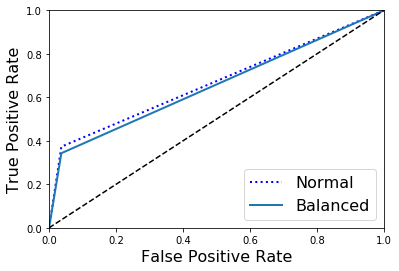

In [42]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(b_test_yd, b_lr_d_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yd, lr_d_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr, tpr, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Readmitted

In [129]:
lr_r = LogisticRegression()
train_acc_score = cross_val_score(lr_r, train,train_yr,scoring="accuracy", cv=5)
average_acc = train_acc_score.mean()
print("Trainnng error: ", average_acc)

Trainnng error:  0.8471238184095615


In [130]:
lr_r.fit(train, train_yr)
lr_r_preds = lr_r.predict(test)
test_acc_score = accuracy_score(test_yr, lr_r_preds)
print("Test error: ", test_acc_score)

Test error:  0.8396637608966376


### 2. KNN

### Death

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = [{'weights': ["uniform", "distance"], 'n_neighbors': [19, 21, 23, 25]}]
knn_grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, verbose=3, n_jobs=-1)
knn_grid.fit(train, train_yd)
print("Best training Accuracy: ", knn_grid.best_score_)
print("Best parameters: ", knn_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.3s finished


Best training Accuracy:  0.8102280861453457
Best parameters:  {'n_neighbors': 23, 'weights': 'uniform'}


In [46]:
best_knn_d = KNeighborsClassifier(n_neighbors=23, weights='uniform')
best_knn_d.fit(train, train_yd)
preds = best_knn_d.predict(test)
print("Test accuracy: ", accuracy_score(test_yd, preds), '- F1 score: ', f1_score(test_yd, preds))

b_best_knn_d = KNeighborsClassifier(n_neighbors=23, weights='uniform')
b_best_knn_d.fit(b_train_d, b_train_yd)
b_preds = b_best_knn_d.predict(b_test_d)
print("Test accuracy for balanced samples: ", accuracy_score(b_test_yd, b_preds), '- F1 score: ', f1_score(b_test_yd, b_preds))

Test accuracy:  0.798879202988792 - F1 score:  0.0
Test accuracy for balanced samples:  0.5223765432098766 - F1 score:  0.505591054313099


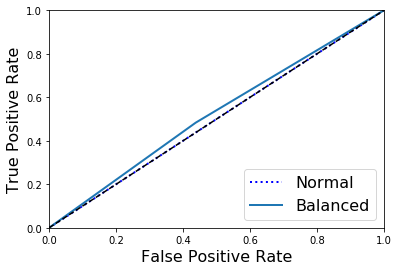

In [55]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yd, b_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yd, preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Readmitted

In [131]:
grid_params = [{'weights': ["uniform", "distance"], 'n_neighbors': [15, 17, 19]}]
knn_grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, verbose=3, n_jobs=-1)
knn_grid.fit(train, train_yr)
print("Best training Accuracy: ", knn_grid.best_score_)
print("Best parameters: ", knn_grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.6s finished


Best training Accuracy:  0.84727952101758
Best parameters:  {'n_neighbors': 19, 'weights': 'uniform'}


In [135]:
best_knn_d = KNeighborsClassifier(n_neighbors=19, weights='uniform')
best_knn_d.fit(train, train_yr)
print("Test accuracy: ", accuracy_score(test_yr, best_knn_d.predict(test)), '- F1 score: ', f1_score(test_yr, best_knn_d.predict(test)))

Test accuracy:  0.839975093399751 - F1 score:  0.0


### 3. Decision Tree

### Death

In [154]:
from sklearn.tree import DecisionTreeClassifier

grid_params = {"max_depth":[2,4,10], "min_samples_split":[2,3,4]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), grid_params, cv=5)
dt_grid.fit(train, train_yd)
print("Best training Accuracy: ", dt_grid.best_score_)
print("Best parameters: ", dt_grid.best_params_)

Best training Accuracy:  0.9048026984413079
Best parameters:  {'max_depth': 4, 'min_samples_split': 2}


In [52]:
best_dt_d = DecisionTreeClassifier(max_depth=4, min_samples_split=3, random_state=0)
best_dt_d.fit(train, train_yd)
best_dt_d_preds = best_dt_d.predict(test)
print("Test accuracy: ", accuracy_score(test_yd, best_dt_d_preds), '- F1 score: ', f1_score(test_yd, best_dt_d_preds))

b_best_dt_d = DecisionTreeClassifier(max_depth=4, min_samples_split=3, random_state=0)
b_best_dt_d.fit(b_train_d, b_train_yd)
b_best_dt_d_preds = b_best_dt_d.predict(b_test_d)
print("Test accuracy: ", accuracy_score(b_test_yd, b_best_dt_d_preds), '- F1 score: ', f1_score(b_test_yd, b_best_dt_d_preds))


Test error:  0.8960149439601495 - F1 score:  0.7044247787610619
Test error:  0.8547453703703703 - F1 score:  0.8538715311469047


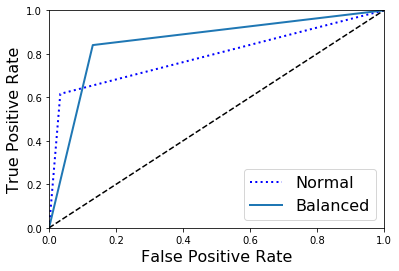

In [54]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yd, b_best_dt_d_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yd, best_dt_d_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Readmitted

In [136]:
grid_params = {"max_depth":[2,4,10, 20], "min_samples_split":[2,3,4,5]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), grid_params, cv=5)
dt_grid.fit(train, train_yr)
print("Best training Accuracy: ", dt_grid.best_score_)
print("Best parameters: ", dt_grid.best_params_)

Best training Accuracy:  0.8493813850564876
Best parameters:  {'max_depth': 4, 'min_samples_split': 4}


In [141]:
best_dt_r = DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=0)
best_dt_r.fit(train, train_yr)
best_dt_r_preds = best_dt_r.predict(test)
print("Test Accuracy: ", accuracy_score(test_yr, best_dt_r_preds), 'F1 score: ', f1_score(test_yr, best_dt_r_preds))

Test Accuracy:  0.8405977584059776 F1 score:  0.13220338983050847


### 4. Bagging

### Death

In [57]:
from sklearn.ensemble import BaggingClassifier

grid_params = [
    {'base_estimator': [LogisticRegression(), DecisionTreeClassifier(random_state=0)], 
     'n_estimators': [10, 20, 30],
     'bootstrap_features': [True]}
]
bag_grid_d = GridSearchCV(BaggingClassifier(random_state=0), grid_params, cv=5)
bag_grid_d.fit(train, train_yd)
print("Best training accuracy: ", bag_grid_d.best_score_)
print("Best parameters: ", bag_grid_d.best_params_)

Best training MSE:  0.9152328647613797
Best parameters:  {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), 'bootstrap_features': True, 'n_estimators': 30}


In [95]:
best_bagging_d = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), bootstrap_features=True, n_estimators=30)
best_bagging_d.fit(train, train_yd)
best_bagging_d = best_bagging_d.predict(test)
print("Test error: ", accuracy_score(test_yd, best_bagging_d_preds), 'F1 score: ', f1_score(test_yd, best_bagging_d_preds))

b_best_bagging_d = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), bootstrap_features=True, n_estimators=30)
b_best_bagging_d.fit(b_train_d, b_train_yd)
b_best_bagging_d_preds = b_best_bagging_d.predict(b_test_d)
print("Test error for balanced samples: ", accuracy_score(b_test_yd, b_best_bagging_d_preds), 'F1 score: ', f1_score(b_test_yd, b_best_bagging_d_preds))

Test error:  0.8567870485678705 F1 score:  0.6439628482972136
Test error for balanced samples:  0.923804012345679 F1 score:  0.9222593977563472


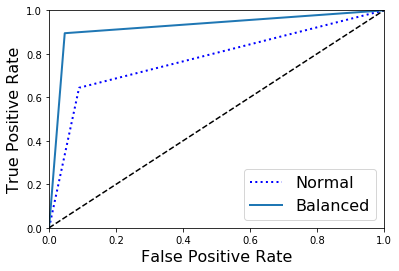

In [96]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yd, b_best_bagging_d_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yd, best_bagging_d_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Readmitted

In [94]:
grid_params = [
    {'base_estimator': [LogisticRegression(), DecisionTreeClassifier(random_state=0)], 
     'n_estimators': [10, 20, 30],
     'bootstrap_features': [True]}
]
bag_grid_r = GridSearchCV(BaggingClassifier(random_state=0), grid_params, cv=5)
bag_grid_r.fit(train, train_yr)
print("Best training accuracy: ", bag_grid_r.best_score_)
print("Best parameters: ", bag_grid_r.best_params_)

Best training MSE:  0.8503152371965654
Best parameters:  {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), 'bootstrap_features': True, 'n_estimators': 30}


In [101]:
best_bagging_r = b_best_bagging_d = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), bootstrap_features=True, n_estimators=30)
best_bagging_r.fit(train, train_yr)
best_bagging_r_preds = best_bagging_r.predict(test)
print("Test accuracy: ", accuracy_score(test_yr, best_bagging_r_preds), 'F1 score: ', f1_score(test_yr, best_bagging_r_preds))

b_best_bagging_r = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), bootstrap_features=True, n_estimators=30)
b_best_bagging_r.fit(b_train_r, b_train_yr)
b_best_bagging_r_preds = b_best_bagging_r.predict(b_test_r)
print("Test accuracy for balanced samples: ", accuracy_score(b_test_yr, b_best_bagging_r_preds), 'F1 score: ', f1_score(b_test_yr, b_best_bagging_r_preds))

Test accuracy:  0.8468244084682441 F1 score:  0.16610169491525423
Test accuracy for balanced samples:  0.8840230098348487 F1 score:  0.8726309353984104


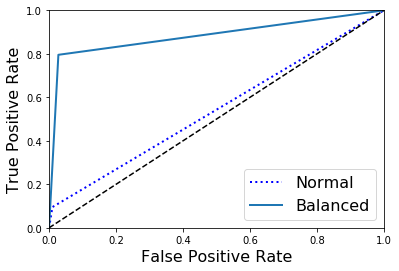

In [103]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yr, b_best_bagging_r_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yr, best_bagging_r_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### 5. Random Forest

### Death

In [152]:
from sklearn.ensemble import RandomForestClassifier

grid_params = [
    {'n_estimators': [10, 20, 30], 'max_depth': [None, 1, 5, 7], 
     'max_features':[10, 20, 30], 'max_leaf_nodes':[2, 4], 
     'min_samples_split':[2, 4]}
]
rf_grid_d = GridSearchCV(RandomForestClassifier(random_state=0), grid_params, cv=5)
rf_grid_d.fit(train, train_yd)
print("Best training accuracy: ", rf_grid_d.best_score_)
print("Best parameters: ", rf_grid_d.best_params_)

Best training accuracy:  0.899976917239823
Best parameters:  {'max_depth': None, 'max_features': 30, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 20}


In [66]:
best_rf_d = RandomForestClassifier(max_depth=None, max_features=30, max_leaf_nodes=4, min_samples_split=2, 
                                   n_estimators=20, random_state=0)
best_rf_d.fit(train, train_yd)
best_rf_d_preds = best_rf_d.predict(test)
print("Test error: ", accuracy_score(test_yd, best_rf_d_preds), '- F1 score: ', f1_score(test_yd, best_rf_d_preds))

b_best_rf_d = RandomForestClassifier(max_depth=None, max_features=30, max_leaf_nodes=4, min_samples_split=2, 
                                   n_estimators=20, random_state=0)
b_best_rf_d.fit(b_train_d, b_train_yd)
b_best_rf_d_preds = best_rf_d.predict(b_test_d)
print("Test error: ", accuracy_score(b_test_yd, b_best_rf_d_preds), '- F1 score: ', f1_score(b_test_yd, b_best_rf_d_preds))

Test error:  0.8838729763387297 - F1 score:  0.686817800167926
Test error:  0.7561728395061729 - F1 score:  0.7021677662582471


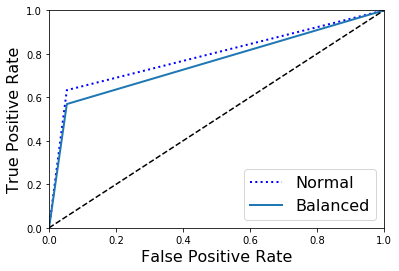

In [67]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yd, b_best_rf_d_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yd, best_rf_d_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Readmitted

In [153]:
grid_params = [
    {'n_estimators': [10, 20, 30], 'max_depth': [None, 1, 5, 7], 
     'max_features':[10, 20, 30], 'max_leaf_nodes':[2, 4], 
     'min_samples_split':[2, 4]}
]
rf_grid_r = GridSearchCV(RandomForestClassifier(random_state=0), grid_params, cv=5)
rf_grid_r.fit(train, train_yr)
print("Best training accuracy: ", rf_grid_r.best_score_)
print("Best parameters: ", rf_grid_r.best_params_)

Best training accuracy:  0.8473573723215895
Best parameters:  {'max_depth': None, 'max_features': 10, 'max_leaf_nodes': 2, 'min_samples_split': 2, 'n_estimators': 10}


In [144]:
best_rf_r = RandomForestClassifier(max_depth=None, max_features=10, max_leaf_nodes=2, min_samples_split=2, 
                                   n_estimators=10, random_state=0)
best_rf_r.fit(train, train_yr)
print("Test Accuracy: ", accuracy_score(test_yr, best_rf_r.predict(test)), 'F1 score: ', f1_score(test_yr, best_rf_r.predict(test)))

Test Accuracy:  0.839975093399751 F1 score:  0.0


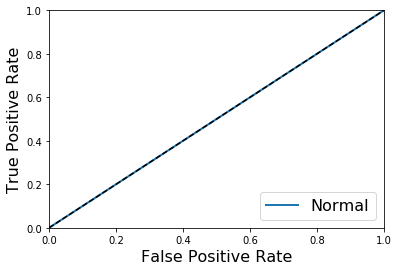

In [145]:
fpr, tpr, thresholds = roc_curve(test_yr, best_rf_r.predict(test))
plot_roc_curve(fpr, tpr, 'Normal')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### 6. SVM

### Death

In [ ]:
from sklearn.svm import SVC

grid_params = {"kernel": ["linear", "rbf", "poly"],  
          "C": [0.1, 0.5, 1], 
          "tol": [0.1], 
          "decision_function_shape":["ovr"]}
svc_grid_d = GridSearchCV(svm.SVC(), grid_params, cv=5)
svc_grid_d.fit(train, train_yd)
print("Best training accuracy: ", svc_grid_d.best_score_)
print("Best parameters: ", svc_grid_d.best_params_)

In [ ]:
best_svm_d = SVC()
best_svm_d.fit(train, train_yd)
print("Test error: ", accuracy_score(test_yd, best_svm_d.predict(test)))

### Readmitted

In [ ]:
from sklearn.svm import SVC

grid_params = {"kernel": ["linear", "rbf", "poly"],  
          "C": [0.1, 0.5, 1], 
          "tol": [0.1], 
          "decision_function_shape":["ovr"]}
svc_grid_r = GridSearchCV(svm.SVC(), grid_params, cv=5)
svc_grid_r.fit(train, train_yr)
print("Best training accuracy: ", svc_grid_r.best_score_)
print("Best parameters: ", svc_grid_r.best_params_)

In [ ]:
best_rf_r = RandomForestClassifier(random_state=0)
best_rf_r.fit(train, train_yr)
print("Test error: ", accuracy_score(test_yr, best_rf_r.predict(test)))

### 7. XGBoost 

### Death

In [156]:
import xgboost as xgb

grid_params = {
    'eta': [0.3], 
    'max_depth': [3, 6, 9],  
    'objective': ['multi:softprob'],  
    'num_class': [3, 6], 'steps': [20]} 
xgb_grid_d = GridSearchCV(xgb.XGBClassifier(), grid_params, cv=5)
xgb_grid_d.fit(train, train_yd)
print("Best training accuracy: ", xgb_grid_d.best_score_)
print("Best parameters: ", xgb_grid_d.best_params_)

Best training accuracy:  0.918657716291067
Best parameters:  {'eta': 0.3, 'max_depth': 9, 'num_class': 3, 'objective': 'multi:softprob', 'steps': 20}


In [73]:
best_xgb_d = xgb.XGBClassifier(eta=0.3, max_depth=9, num_class=3, objective='multi:softprob', steps=20)
best_xgb_d.fit(train, train_yd)
best_xgb_d_preds = best_xgb_d.predict(test)
print("Test error: ", accuracy_score(test_yd, best_xgb_d_preds), '- F1 scores: ', f1_score(test_yd, best_xgb_d_preds))

b_best_xgb_d = xgb.XGBClassifier(eta=0.3, max_depth=9, num_class=3, objective='multi:softprob', steps=20)
b_best_xgb_d.fit(b_train_d, b_train_yd)
b_best_xgb_d_preds = b_best_xgb_d.predict(b_test_d)
print("Test error: ", accuracy_score(b_test_yd, b_best_xgb_d_preds), '- F1 scores: ', f1_score(b_test_yd, b_best_xgb_d_preds))

Test error:  0.9078455790784558 - F1 scores:  0.7465753424657534
Test error:  0.9392361111111112 - F1 scores:  0.93841642228739


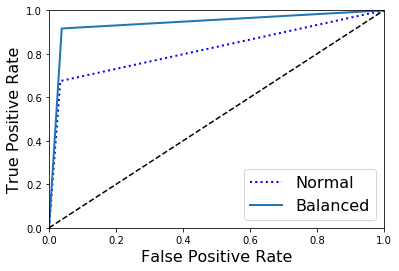

In [75]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yd, b_best_xgb_d_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yd, best_xgb_d_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Readmitted

In [90]:
grid_params = {
    'eta': [0.3], 
    'max_depth': [3, 6, 9],  
    'objective': ['multi:softprob'],  
    'num_class': [3, 6], 'steps': [20]} 
xgb_grid_r = GridSearchCV(xgb.XGBClassifier(), grid_params, cv=5)
xgb_grid_r.fit(train, train_yr)
print("Best training accuracy: ", xgb_grid_r.best_score_)
print("Best parameters: ", xgb_grid_r.best_params_)

Best training MSE:  0.8530395784518495
Best parameters:  {'eta': 0.3, 'max_depth': 6, 'num_class': 3, 'objective': 'multi:softprob', 'steps': 20}


In [91]:
best_xgb_r = xgb.XGBClassifier(eta=0.3, max_depth=6, num_class=3, objective='multi:softprob', steps=20)
best_xgb_r.fit(train, train_yr)
best_xgb_r_preds = best_xgb_r.predict(test)
print("Test accuracy: ", accuracy_score(test_yr, best_xgb_r_preds), '- F1 score: ', f1_score(test_yr, best_xgb_r_preds))

b_best_xgb_r = xgb.XGBClassifier(eta=0.3, max_depth=6, num_class=3, objective='multi:softprob', steps=20)
b_best_xgb_r.fit(b_train_r, b_train_yr)
b_best_xgb_r_preds = b_best_xgb_d.predict(b_test_r)
print("Test accuracy for balanced samples: ", accuracy_score(b_test_yr, b_best_xgb_r_preds), '- F1 scores: ', f1_score(b_test_yr, b_best_xgb_r_preds))


Test accuracy:  0.8493150684931506 - F1 score:  0.22186495176848872
Test accuracy for balanced samples:  0.7656336982742624 - F1 scores:  0.7548048922539313


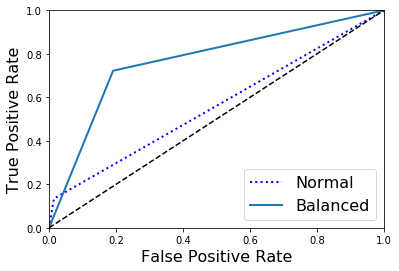

In [92]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yr, b_best_xgb_r_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yr, best_xgb_r_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### 8. QDA

### Death

In [147]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

grid_params = {} 
qda_grid_d = GridSearchCV(QuadraticDiscriminantAnalysis(), grid_params, cv=5)
qda_grid_d.fit(train, train_yd)
print("Best training accuracy: ", qda_grid_d.best_score_)
print("Best parameters: ", qda_grid_d.best_params_)

Best training accuracy:  0.869853157900317
Best parameters:  {}


In [ ]:
best_qda_d = QDA()
best_qda_d.fit(train, train_yd)
print("Test error: ", accuracy_score(test_yd, best_xgb_d.predict(test)))

### Readmitted

In [ ]:
grid_params = {} 
qda_grid_r = GridSearchCV(QDA(), grid_params, cv=5)
qda_grid_r.fit(train, train_yr)
print("Best training accuracy: ", qda_grid_r.best_score_)
print("Best parameters: ", qda_grid_r.best_params_)

In [ ]:
best_qda_r = QDA()
best_qda_r.fit(train, train_yr)
print("Test error: ", accuracy_score(test_yr, best_xgb_r.predict(test)))

### 9.LDA

### Death

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

grid_params = {'n_components': [None, 1, 3, 5], 'tol': [0.0001, 0.001, 0.01]} 
lda_grid_d = GridSearchCV(LinearDiscriminantAnalysis(), grid_params, cv=5)
lda_grid_d.fit(train, train_yd)
print("Best training accuracy: ", lda_grid_d.best_score_)
print("Best parameters: ", lda_grid_d.best_params_)

Best training accuracy:  0.9145322030252956
Best parameters:  {'n_components': None, 'tol': 0.0001}


In [80]:
best_lda_d = LinearDiscriminantAnalysis(n_components=None, tol=0.0001)
best_lda_d.fit(train, train_yd)
best_lda_d_preds = best_lda_d.predict(test)
print("Test accuracy: ", accuracy_score(test_yd, best_lda_d_preds), '- F1 score: ', f1_score(test_yd, best_lda_d_preds))

b_best_lda_d = LinearDiscriminantAnalysis(n_components=None, tol=0.0001)
b_best_lda_d.fit(b_train_d, b_train_yd)
b_best_lda_d_preds = b_best_lda_d.predict(b_test_d)
print("Test accuracy: ", accuracy_score(b_test_yd, b_best_lda_d_preds), '- F1 score: ', f1_score(b_test_yd, b_best_lda_d_preds))

Test accuracy:  0.9041095890410958 - F1 score:  0.7403035413153457
Test accuracy:  0.9232253086419753 - F1 score:  0.9204318272690925


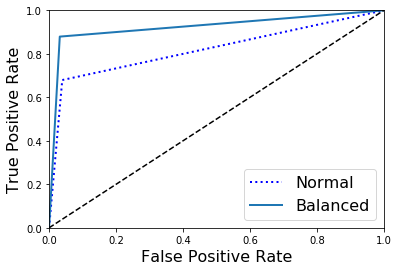

In [83]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yd, b_best_lda_d_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yd, best_lda_d_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Readmitted

In [149]:
grid_params = {'n_components': [None, 1, 3, 5], 'tol': [0.0001, 0.001, 0.01]} 
lda_grid_r = GridSearchCV(LinearDiscriminantAnalysis(), grid_params, cv=5)
lda_grid_r.fit(train, train_yr)
print("Best training accuracy: ", lda_grid_r.best_score_)
print("Best parameters: ", lda_grid_r.best_params_)

Best training accuracy:  0.8492257733254774
Best parameters:  {'n_components': None, 'tol': 0.0001}


In [151]:
best_lda_r = LinearDiscriminantAnalysis(n_components=None, tol=0.0001)
best_lda_r.fit(train, train_yr)
best_lda_r_preds = best_lda_r.predict(test)
print("Test accuracy: ", accuracy_score(test_yr, best_lda_r_preds), '- F1 score: ', f1_score(test_yr, best_lda_r_preds))

b_best_lda_r = LinearDiscriminantAnalysis(n_components=None, tol=0.0001)
b_best_lda_r.fit(b_train_r, b_train_yr)
b_best_lda_r_preds = b_best_lda_r.predict(b_test_r)
print("Test accuracy: ", accuracy_score(b_test_yr, b_best_lda_r_preds), '- F1 score: ', f1_score(b_test_yr, b_best_lda_r_preds))

Test accuracy:  0.8452677459526775 - F1 score:  0.1265377855887522
Test accuracy:  0.8875487103358694 - F1 score:  0.8734864300626304


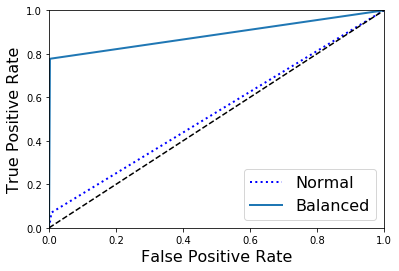

In [89]:
fpr1, tpr1, thresholds1 = roc_curve(b_test_yr, b_best_lda_r_preds)
fpr2, tpr2, thresholds2 = roc_curve(test_yr, best_lda_r_preds)
plt.plot(fpr2, tpr2, "b:", linewidth=2, label="Normal")
plot_roc_curve(fpr1, tpr1, 'Balanced')
plt.legend(loc="lower right", fontsize=16)
plt.show()